## Présentation
Un problème classique dans le domaine de la reconnaissance de formes est celui de la reconnaissance de chiffres manuscrits

Le but de ce projet est de développer un modèle capable d'identifier correctement le chiffre (entre 0 et 9) écrit dans une image. Vous utiliserez pour cela l’algorithme SVM qui devrait correctement classifier les chiffres manuscrits de 0 à 9 en fonction des valeurs de pixels données comme caractéristiques. Chaque image contenant un chiffre est de 28 x 28 pixels et que chaque pixel forme une caractéristique, il y a 784 caractéristiques.

Avec un sous-échantillon de 10 à 20% des données d'entraînement, nous devrions nous attendre à obtenir une précision de plus de 90%. Vous vous appuierez sur le dataset sur le lien suivant : https://www.kaggle.com/c/digit-recognizer/data Il s’appuie sur la base de données MNIST qui est une base de données de chiffres écrits à la main : http://yann.lecun.com/exdb/mnist/

Pour plus d’informations faites un tour sur wikipédia !

## Les différentes étapes  
**Etape 1** : Organisez votre projet  

- Commencez par lister les différentes étapes de votre projet et répartissez-vous de façon équitable les tâches  

- Organisez des points d’avancement au sein de votre équipe pour partager vos avancées et vos difficultés.  

**Etape 2** : Décrivez votre jeu de données  

- Vérifiez les valeurs manquantes, la taille, le type etc…  

- Identifiez les valeurs uniques et le nombre de données pour chaque valeur unique  

**Etape 3** : Visualisez votre jeu de données  

- Affichez quelques chiffres  

- Visualisez la matrice de corrélation de pixels. Est-ce normal ?  

**Etape 4** : Préparez vos données

- D’après vous est-il nécessaire de standardiser vos données ? Pourquoi ?

**Etape 5** : Construisez votre modèle  

- Essayez tout d’abord un modèle lineaire avec l’option linear kernel  

- Puis essayez ‘poly’  

- Et ‘rbf’  

Utilisez dans un premier temps les paramètres par défaut.  

In [6]:

# On charge les librairies

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [7]:
# Le fichier .csv a été chargé dans le dossier data
# On récupère le jeu de données sous forme de Dataframe grâce à Pandas

df = pd.read_csv('data/train.csv')

---
### Etape 2 : Décrivez votre jeu de données  

#### Dimension de la Dataframe chargée en mémoire :

In [8]:
# On vérifie les dimensions de la Dataframe

df.shape

(42000, 785)

On constate qu'on obtient **42.000** entrée et **785** colonnes.  
On note que 28x28 = **784**, le nombre de colonnes est donc cohérent.  
Examinons le contenu des colonnes de plus près :  

#### Type de données des colonnes :  

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


L'information importante est que toutes les colonnes contiennent des **entiers** de type **int64**.  

#### Intitulé des colonnes :
-  Examen des premières entrées de la Dataframe

In [11]:
# On examine les 20 premières entrées de la Dataframe

df.head(20)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0       1       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       1       0       0       0       0       0       0       0       0   
3       4       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0       0       0       0       0   
6       7       0       0       0       0       0       0       0       0   
7       3       0       0       0       0       0       0       0       0   
8       5       0       0       0       0       0       0       0       0   
9       3       0       0       0       0       0       0       0       0   
10      8       0       0       0       0       0       0       0       0   
11      9       0       0       0       0       0       0       0       0   
12      1       0       0       0       0       0       0       0       0   
13      3       0       0       0       0       0       0       0       0   
14      3       0       0       0       0       0       0       0       0   
15      1       0       0       0       0       0       0       0       0   
16      2       0       0       0       0       0       0       0       0   
17      0       0       0       0       0       0       0       0       0   
18      7       0       0       0       0       0       0       0       0   
19      5       0       0       0       0       0       0       0       0   

    pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   
5        0  ...         0         0         0         0         0         0   
6        0  ...         0         0         0         0         0         0   
7        0  ...         0         0         0         0         0         0   
8        0  ...         0         0         0         0         0         0   
9        0  ...         0         0         0         0         0         0   
10       0  ...         0         0         0         0         0         0   
11       0  ...         0         0         0         0         0         0   
12       0  ...         0         0         0         0         0         0   
13       0  ...         0         0         0         0         0         0   
14       0  ...         0         0         0         0         0         0   
15       0  ...         0         0         0         0         0         0   
16       0  ...         0         0         0         0         0         0   
17       0  ...         0         0         0         0         0         0   
18       0  ...         0         0         0         0         0         0   
19       0  ...         0         0         0         0         0         0   

    pixel780  pixel781  pixel782  pixel783  
0          0         0         0         0  
1          0         0         0         0  
2          0         0         0         0  
3          0         0         0         0  
4          0         0         0         0  
5          0         0         0         0  
6          0         0         0         0  
7          0         0         0         0  
8          0         0         0         0  
9          0         0         0         0  
10         0         0         0         0  
11         0         0         0         0  
12         0         0         0         0  
13         0         0         0         0  
14         0         0         0         0  
15    

A priori, les entrées correspondent à nos attentes :  
-  on a une colonne 'label' qui semble correspondre à un chiffre  
-  on a bien 784 pixels numérotés de 0 à 783 pour un chiffre  

#### Valeurs prises par les colonnes :
-  Examen global :  

In [12]:
# On examine les valeurs prises par les colonnes
df.describe()


label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean       0.0      0.0      0.0  ...      0.219286      0.117095   
std        0.0      0.0      0.0  ...      6.312890      4.633819   
min        0.0      0.0      0.0  ...      0.000000      0.000000   
25%        0.0      0.0      0.0  ...      0.000000      0.000000   
50%        0.0      0.0      0.0  ...      0.000000      0.000000   
75%        0.0      0.0      0.0  ...      0.000000      0.000000   
max        0.0      0.0      0.0  ...    254.000000    254.000000   

           pixel776     pixel777      pixel778      pixel779  pixel780  \
count  42000.000000  42000.00000  42000.000000  42000.000000   42000.0   
mean       0.059024      0.02019      0.017238      0.002857       0.0   
std        3.274488      1.75987      1.894498      0.414264       0.0   
min        0.000000      0.00000      0.000000      0.000000       0.0   
25%        0.000000      0.00000      0.000000      0.000000       0.0   
50%        0.000000      0.00000      0.000000      0.000000       0.0   
75%        0.000000      0.00000      0.000000      0.000000       0.0   
max      253.000000    253.00000    254.000000     62.000000       0.0   

       pixel781  pixel782  pixel783  
count   42000.0   42000.0   42000.0  
mean        0.0       0.0       0.0  
std         0.0       0.0       0.0  
min         0.0       0.0       0.0  
25%         0.0       0.0       0.0  
50%         0.0       0.0       0.0  
75%         0.0       0.0       0.0  
max         0.0       0.0       0.0  

[8 rows x 785 columns]

L'information la plus importante est que les valeurs entières de la colonne 'label' se situent bien entre 0 et 9.  
Les pixels 1-8 et 780-783 ne prennent que la valeur nulle, ce qui s'explique sans doute par le fait qu'ils soient au bord de l'image.  
Les pixels 774 à 778 prennent principalement la valeur nulle et plafonnent à 253-254.  
On soupçonne fortement à ce stade que l'intensité des pixels est codée sur 8 bits de 0 à 255, ce qui requiert une confimation.  

-  Valeurs de 'label' :

In [33]:
# On obtient la réparation des 10 valeurs de 'label'
# On passe par une Dataframe pour garder l'order des valeurs et rendre la sortie plus 'jolie'

pd.DataFrame(df.label.value_counts()).sort_index()

label
0   4132
1   4684
2   4177
3   4351
4   4072
5   3795
6   4137
7   4401
8   4063
9   4188

La répartition des valeurs est tout à fait raisonnable, on note juste que le nombre de 5 est un peu moins bien représenté.

-  Valeurs des pixels :  

In [35]:
# On calcul le maximum des colonnes
# On selectionne les maxima correspondant aux pixels
# On calcule un maximum global à partir de ces maxima

df.max()[1:].max()

255

Les pixels sont bien codés sur ***8 bits** de 0 à 255 comme on le soupçonnait.

---
### Etape 3 : Visualisez votre jeu de données  

- Affichez quelques chiffres  

In [36]:
def affiche(n):
    label = df['label'][n]
    image =  df.iloc[n].drop('label')
    # Print label
    print("Chiffre : ",label)
    # Print the image
    plt.imshow(np.array(image).reshape((28,28)), cmap='Greys_r')

Chiffre :  0


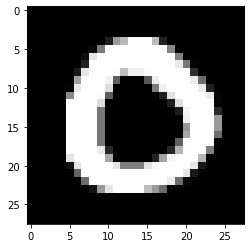

In [37]:
affiche(4)

In [38]:
def affiche9(n):
    fig = plt.figure()
    for i in range(9):
        image =  df.iloc[n+i].drop('label')
        fig.add_subplot(331+i)
        plt.imshow(np.array(image).reshape((28,28)), cmap='Greys_r')

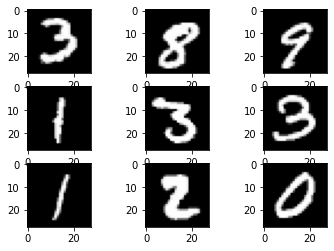

In [39]:
affiche9(9)


- Visualisez la matrice de corrélation de pixels

-  Est-ce normal ?

In [ ]:
#AJ
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [ ]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred_5 = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_test_pred_5 = sgd_clf.predict(X_test)

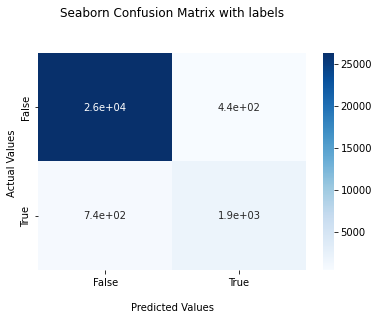

In [ ]:
ax = sns.heatmap(confusion_matrix(y_train_5, y_train_pred_5), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix : train set\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test_5, y_test_pred_5), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix : train set\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#AJ
from sklearn.kernel_approximation import RBFSampler


rbf_feature = RBFSampler(gamma=1, random_state=1)
X_features = rbf_feature.fit_transform(X)
clf = SGDClassifier(max_iter=200)
clf.fit(X_features, y)

clf.score(X_features, y)

0.10507142857142857

In [ ]:
#AJ
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
#AJ

In [ ]:
#AJ

In [ ]:
#EB

In [ ]:
#EB

In [ ]:
#EB

In [ ]:
#EB